# Ecoulement mixte Poiseuille Couette plan en VDF.

In [1]:
from trustutils import run

run.introduction("Yannick Gorsse, Elie Saikali")
run.description("")
run.TRUST_parameters()

## Introduction 
 Validation made by : Yannick Gorsse, Elie Saikali



 Report generated 17/02/2022

### Description 


### TRUST parameters 
 * Version TRUST: 1.8.5_beta
 * Binary used: /export/home/catA/es243900/projects/devElie/TRUST/exec/TRUST_mpi_opt (built on TRUST /export/home/catA/es243900/projects/devElie/TRUST/Validation/Rapports_automatiques/Verification/Verification_codage/poiseuille_vdf/build)

In [2]:
from trustutils import run
import os, sys

# Load MEDCoupling environment
run.useMEDCoupling()

# Trigger the copy of the src directory into the build directory:
run.defaultSuite_ = run.TRUSTSuite(runPrepare=False)

# Path of weird mesh Python module
sys.path.append(os.environ["TRUST_ROOT"] + "/Validation/Rapports_automatiques/Verification/PolyMAC/share/maquette_decapoly/src/")

# Invoke prepare_python.py (which structures the directories), and copy post_run script
origin, build_dir = os.getcwd(), run.defaultSuite_.getBuildDirectory()
os.chdir(build_dir)
exec(open( "prepare_python.py").read())  #  the various run.addCase() are called there
os.chdir(origin)

for i in ["const", "var"]:
    for j in ["explicit", "implicit", "uzawa"]:
        run.addCase(f"{i}/{j}","jdd.data")

run.printCases()
run.runCases()


### Test cases 
* const/explicit/jdd.data : 
* const/implicit/jdd.data : 
* const/uzawa/jdd.data : 
* var/explicit/jdd.data : 
* var/implicit/jdd.data : 
* var/uzawa/jdd.data : 


Running **with Sserver**...
  => A total of 6 cases were (successfully) run in 14.1s.


## TRUST vs theory

### Pressure profiles

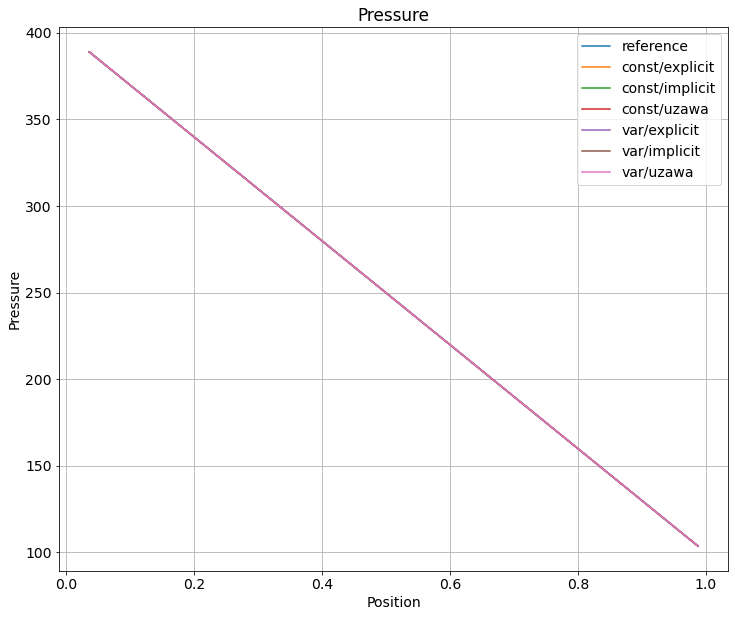

In [3]:
from trustutils import plot

a=plot.Graph("Pressure")
a.addSegment("const/explicit/jdd_P_EX.son",label="reference",compo=1)
for i in ["const", "var"]:
    for j in ["explicit", "implicit", "uzawa"]:
        a.addSegment(f"{i}/{j}/jdd_P.son",label=f"{i}/{j}",compo=1)
        
a.label("Position", "Pressure")


### Velocity profiles

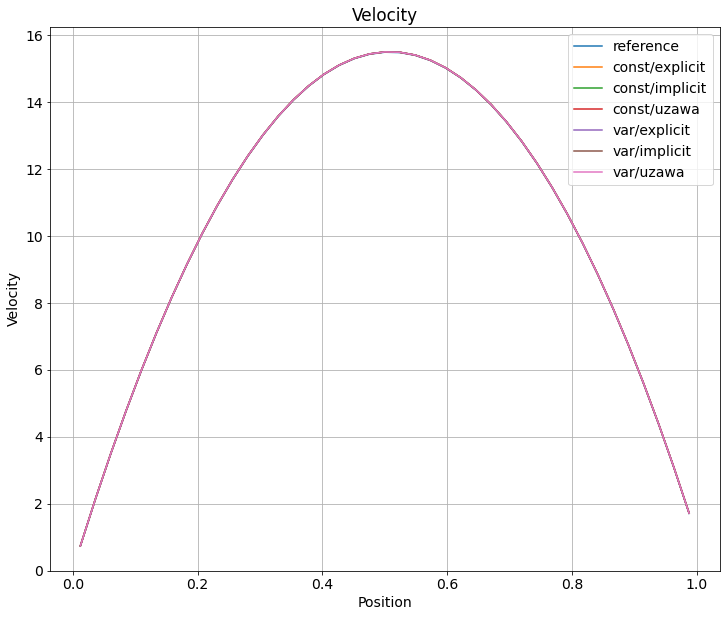

In [4]:
from trustutils import plot

a=plot.Graph("Velocity")
a.addSegment("const/explicit/jdd_V_EX.son",label="reference",compo=0)
for i in ["const", "var"]:
    for j in ["explicit", "implicit", "uzawa"]:
        a.addSegment(f"{i}/{j}/jdd_V.son",label=f"{i}/{j}",compo=0)
        
a.label("Position", "Velocity")